In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [ ]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
! ls
cupid = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Cupid_Data/profiles_processed_data.csv')


Mounted at /content/gdrive/
gdrive	sample_data


In [ ]:
cupid.describe()

,body_type,drinks,drugs,height,income,orientation,sex,smokes,status,record,new_sign,new_religion,age
count,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000
mean,4.974813,2.839946,1.206891,68.196951,25011.899419,1.390574,1.411423,1.488164,1.176817,30361.794668,6.475444,4.167088,33.265100
std,2.300229,0.759806,0.428628,3.954892,105150.184304,0.961480,0.492102,1.104615,0.650879,17515.564321,3.377759,2.859354,10.337491
min,1.000000,1.000000,1.000000,3.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000
25%,3.000000,3.000000,1.000000,65.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,15103.750000,4.000000,2.000000,26.000000
50%,4.000000,3.000000,1.000000,68.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,30694.500000,6.000000,3.000000,30.000000
75%,6.000000,3.000000,1.000000,71.000000,20000.000000,1.000000,2.000000,1.000000,1.000000,45371.500000,9.000000,6.000000,38.000000
max,12.000000,6.000000,3.000000,95.000000,1000000.000000,4.000000,2.000000,5.000000,5.000000,60550.000000,12.000000,9.000000,69.000000


In [ ]:
cupid_df = cupid

#need sex versus drink, smoke, status
cupid_df1 = cupid[["drinks", "smokes", "status","drugs","body_type","status","new_religion","age", "height", "sex"]]
#need all
cupid_df3 = cupid[["body_type",	"drinks",	"drugs",	"height",	"orientation",	"sex",	"smokes",	"status",		"new_sign",	"new_religion",	"age"]]



In [ ]:
label = "sex"
y = cupid_df1[label]
x = cupid_df1.drop(label, axis=1)
#print(y)
#print(x)

In [ ]:
train, test, target, target_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# SVM
svm = SVC(probability=True)
svm.fit(train, target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_pred = svm.predict(test)
metrics.accuracy_score(target_test, svm_pred)

0.8363049276990032

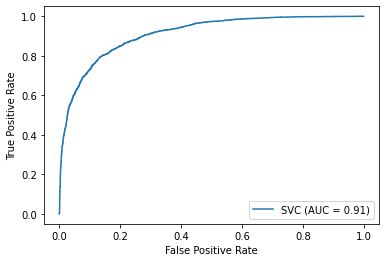

In [ ]:
metrics.plot_roc_curve(svm, test, target_test)

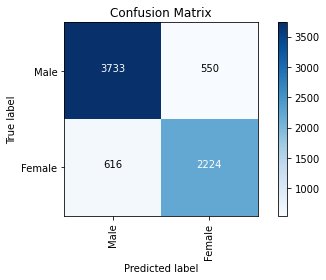

In [ ]:
draw_confusion_matrix(target_test, svm_pred, ['Male', 'Female'])